In [32]:
from PIL import Image
import pandas as pd
import os
import glob
import random
from IPython.display import display
import base64
from io import BytesIO

,File Name,Color Model,Format,Channels,File Size (MB),Width,Height,Full Path,Thumbnail
0,pexels-axlsm-18288614.jpg,RGB,JPEG,3,2.00,4000,6000,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/pexels-axlsm-18288614.jpg,
1,panther-2038656_1280.png,RGBA,PNG,4,2.47,1280,1217,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/panther-2038656_1280.png,
2,pexels-jose-mieres-120847-3699654.jpg,RGB,JPEG,3,1.86,3024,4032,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/pexels-jose-mieres-120847-3699654.jpg,
3,pexels-alesiakozik-6019909.jpg,RGB,JPEG,3,4.84,4000,6000,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/pexels-alesiakozik-6019909.jpg,
4,C4FB15B5-4878-4665-8406-ABE1F9C3A07F.png,RGBA,PNG,4,0.77,1330,1352,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/C4FB15B5-4878-4665-8406-ABE1F9C3A07F.png,
5,3.webp,RGB,WEBP,3,0.01,320,235,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/3.webp,
6,2.webp,RGB,WEBP,3,0.02,320,235,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/2.webp,
7,watermelon-1783870_1280.png,RGB,PNG,3,0.21,1280,1213,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/watermelon-1783870_1280.png,
8,1.webp,RGB,WEBP,3,0.02,320,241,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/1.webp,
9,birthday-6908450_1280.png,RGB,PNG,3,0.37,1280,853,/Users/dmytroivaniv/University/python-data-processing/labwork4imageset/birthday-6908450_1280.png,

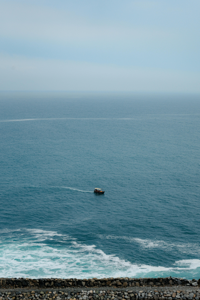
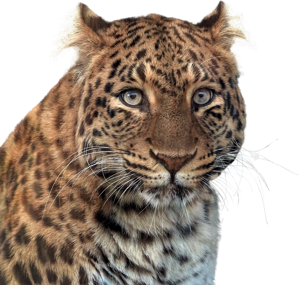
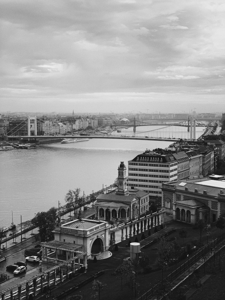
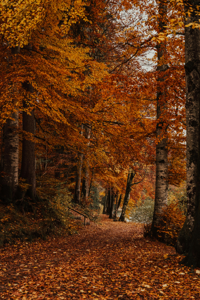
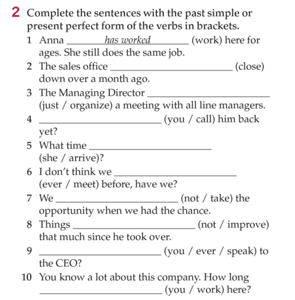
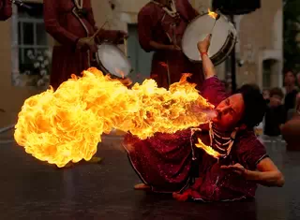
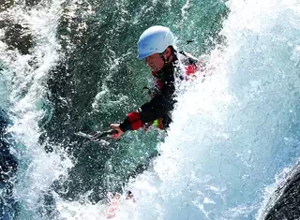
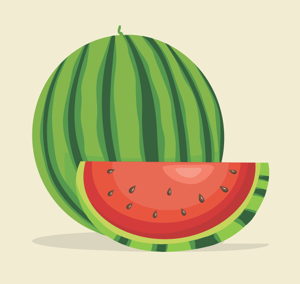
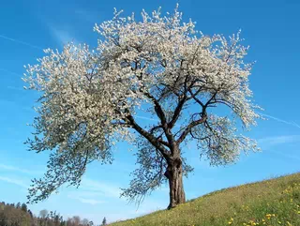
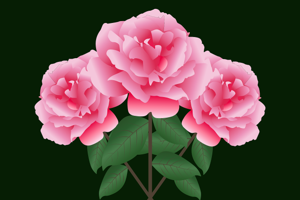
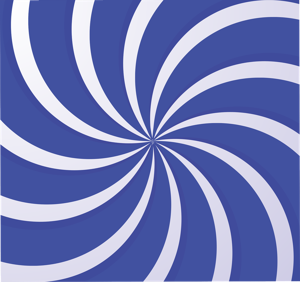
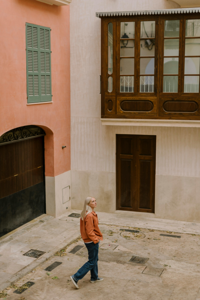
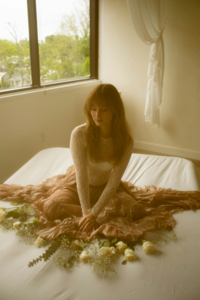

In [34]:
def load_images_from_folder(folder_path):
    data = []
    image_files = glob.glob(f"{folder_path}/*")

    for file_path in image_files:
        try:
            with Image.open(file_path) as img:
                file_name = os.path.basename(file_path)
                color_model = img.mode
                format = img.format
                channels = len(img.getbands())
                file_size = round(os.path.getsize(file_path) / (1024 * 1024), 2)
                width, height = img.size
                full_path = os.path.abspath(file_path)

                img.thumbnail((300, 300))
                thumbnail = BytesIO()
                img.save(thumbnail, format="PNG")
                thumbnail_data = base64.b64encode(thumbnail.getvalue()).decode('utf-8')

                data.append({
                    "File Name": file_name,
                    "Color Model": color_model,
                    "Format": format,
                    "Channels": channels,
                    "File Size (MB)": file_size,
                    "Width": width,
                    "Height": height,
                    "Full Path": full_path,
                    "Thumbnail": f'<img src="data:image/png;base64,{thumbnail_data}" width="400"/>'
                })
        except IOError:
            pass

    df = pd.DataFrame(data)
    pd.set_option('display.max_colwidth', None)
    return HTML(df.to_html(escape=False))

load_images_from_folder('./labwork4imageset')


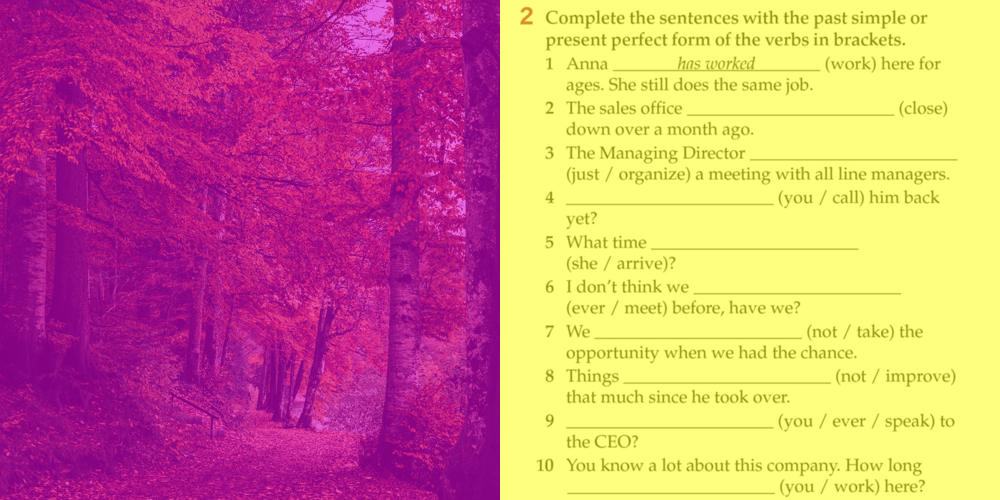

In [36]:
def create_square_image(image, size=500):
    width, height = image.size
    new_side = min(width, height)
    left = (width - new_side) / 2
    top = (height - new_side) / 2
    right = (width + new_side) / 2
    bottom = (height + new_side) / 2
    image = image.crop((left, top, right, bottom))
    image = image.resize((size, size))
    return image

def apply_random_filter(image):
    filter_choice = random.choice(['red', 'green', 'blue', 'yellow', 'magenta', 'cyan'])
    color_filter = Image.new(image.mode, image.size, filter_choice)
    return Image.blend(image, color_filter, alpha=0.5)

def create_poster(folder_path, output_filename, rows, columns, image_size=500):
    image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.lower().endswith(('png', 'jpg', 'jpeg', 'webp'))]
    poster_width = columns * image_size
    poster_height = rows * image_size
    poster = Image.new('RGB', (poster_width, poster_height))

    for row in range(rows):
        for col in range(columns):
            image_path = random.choice(image_files)
            with Image.open(image_path) as img:
                img = create_square_image(img, size=image_size)
                img = apply_random_filter(img)
                x_offset = col * image_size
                y_offset = row * image_size
                poster.paste(img, (x_offset, y_offset))

    poster.save(output_filename)
    display(poster)

output_folder = './labwork4imageset'
output_filename = os.path.join(output_folder, f'poster_variation_{random.randint(1000, 9999)}.jpg')
create_poster(output_folder, output_filename, rows=1, columns=2)
